In [19]:
import requests
#heloguys

## First we get the data from the server, see https://www.alphavantage.co/documentation/
## We use requests.get() to retrieve it

In [20]:
response = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=5min&outputsize=full&apikey=demo")

# Since we are retrieving stuff from a web service, it's a good idea to check for the return status code
# See: https://en.wikipedia.org/wiki/List_of_HTTP_status_codes
if response.status_code != 200:
    raise ValueError("Could not retrieve data, code:", response.status_code)

# The service sends JSON data, we parse that into a Python datastructure    
raw_data = response.json()

In [21]:
# Let's look at the raw data
type(raw_data)

dict

In [22]:
# So it's a dict. what are the keys?
raw_data.keys()

dict_keys(['Meta Data', 'Time Series (5min)'])

In [23]:
# Let's look at the first key/value.
# This is just some descriptive information
raw_data['Meta Data']

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2022-11-09 19:50:00',
 '4. Interval': '5min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [24]:
# The other key/value pair is the actual time series.
# This is a dict as well
time_series = raw_data['Time Series (5min)']
type(time_series)

dict

In [25]:
# How many items are in there?
len(time_series)

3436

In [26]:
# Let's take the first few keys
first_ten_keys = list(time_series.keys())[:10]
# And see the corresponding values
first_ten_items = [f"{key}: {time_series[key]}" for key in first_ten_keys ]
print("\n".join(first_ten_items))

2022-11-09 19:50:00: {'1. open': '225.1900', '2. high': '225.2000', '3. low': '225.0200', '4. close': '225.0200', '5. volume': '2025'}
2022-11-09 19:45:00: {'1. open': '224.9000', '2. high': '225.2000', '3. low': '224.9000', '4. close': '225.1500', '5. volume': '4828'}
2022-11-09 19:40:00: {'1. open': '224.9200', '2. high': '224.9500', '3. low': '224.8900', '4. close': '224.9000', '5. volume': '2399'}
2022-11-09 19:35:00: {'1. open': '224.9100', '2. high': '224.9100', '3. low': '224.8800', '4. close': '224.8800', '5. volume': '689'}
2022-11-09 19:30:00: {'1. open': '224.8900', '2. high': '224.9200', '3. low': '224.7600', '4. close': '224.8900', '5. volume': '4332'}
2022-11-09 19:25:00: {'1. open': '224.7000', '2. high': '224.9900', '3. low': '224.7000', '4. close': '224.9300', '5. volume': '11094'}
2022-11-09 19:20:00: {'1. open': '224.7400', '2. high': '224.8000', '3. low': '224.7000', '4. close': '224.7000', '5. volume': '3936'}
2022-11-09 19:15:00: {'1. open': '224.8600', '2. high':

# Creating a dataframe
We select the column with data, and put this into a dataframe. We transpose the result, and the call to `apply(pd.to_numeric)` converts all columns into numbers.

In [27]:
import pandas as pd

In [28]:
data = raw_data['Time Series (5min)']
df = pd.DataFrame(data).T.apply(pd.to_numeric)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3436 entries, 2022-11-09 19:50:00 to 2022-10-13 04:05:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    3436 non-null   float64
 1   2. high    3436 non-null   float64
 2   3. low     3436 non-null   float64
 3   4. close   3436 non-null   float64
 4   5. volume  3436 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 161.1+ KB


,1. open,2. high,3. low,4. close,5. volume
2022-11-09 19:50:00,225.19,225.20,225.02,225.02,2025
2022-11-09 19:45:00,224.90,225.20,224.90,225.15,4828
2022-11-09 19:40:00,224.92,224.95,224.89,224.90,2399
2022-11-09 19:35:00,224.91,224.91,224.88,224.88,689
2022-11-09 19:30:00,224.89,224.92,224.76,224.89,4332


In [29]:
# Next we parse the index to create a datetimeindex
df.index = pd.DatetimeIndex(df.index)

In [30]:
# Let's fix the column names by chopping off the first 3 characters
df.rename(columns=lambda s: s[3:], inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3436 entries, 2022-11-09 19:50:00 to 2022-10-13 04:05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    3436 non-null   float64
 1   high    3436 non-null   float64
 2   low     3436 non-null   float64
 3   close   3436 non-null   float64
 4   volume  3436 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 161.1 KB


In [32]:
df.head()

,open,high,low,close,volume
2022-11-09 19:50:00,225.19,225.20,225.02,225.02,2025
2022-11-09 19:45:00,224.90,225.20,224.90,225.15,4828
2022-11-09 19:40:00,224.92,224.95,224.89,224.90,2399
2022-11-09 19:35:00,224.91,224.91,224.88,224.88,689
2022-11-09 19:30:00,224.89,224.92,224.76,224.89,4332


<AxesSubplot:>

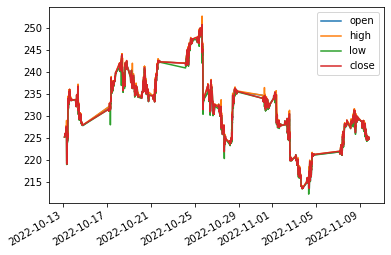

In [33]:
df[['open', 'high', 'low', 'close']].plot()

## Resampling
Pandas contains lots of functions for working with time series. This is important for this project.

See the pandas documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

See also documentation about datetime properties for series: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties

And a nice little tutorial about resampling: http://benalexkeen.com/resampling-time-series-data-with-pandas/

In [34]:
# Let's take last value of the close column for every business day
close_per_day = df.close.resample('B').last()

<AxesSubplot:>

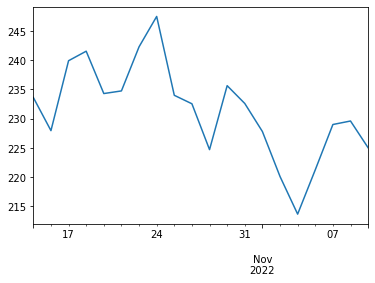

In [35]:
close_per_day.plot()